In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Functional Plot
Basic plot

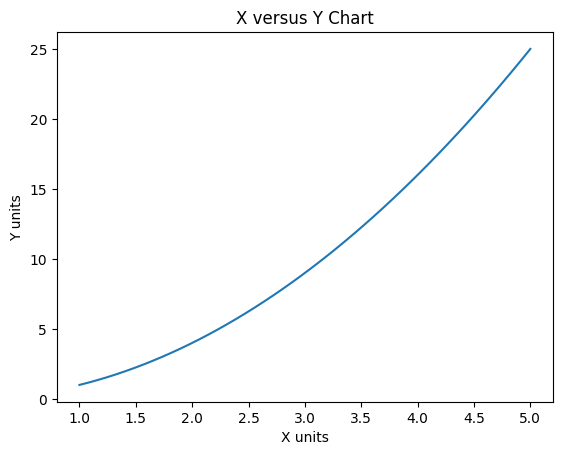

In [3]:
x = np.linspace(1, 5)
y = x ** 2

plt.plot(x,y)
plt.title("X versus Y Chart")
plt.xlabel("X units")
plt.ylabel("Y units")
plt.show()

## Print Multiple Plots

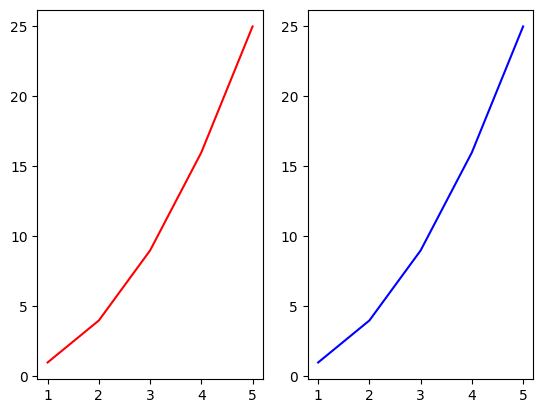

In [4]:
import matplotlib.pyplot as plt

# Data for the plots
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
lineColor = 'r'  # For red line
plt.plot(x, y, color=lineColor)

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
secondLineColor = 'b'  # For blue line
plt.plot(x, y, color=secondLineColor)

plt.show()

## Using Figure Objects
An object that contains all of the plots and can contain many axises.

Text(0, 40, 'Message')

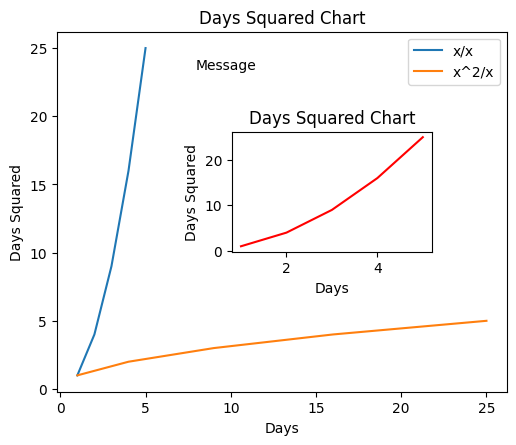

In [5]:
# Create figure to contain the graphs
figure_size_in_inches = (5,4)
fig_1 = plt.figure(figsize=figure_size_in_inches, dpi=100)

# Create graph # 1; add_axis(distance from left, distance from bottom, width of axes, and height of axes)
axes_1 = fig_1.add_axes((0.1,0.1,0.9,0.9))
axes_1.set_xlabel("Days")
axes_1.set_ylabel("Days Squared")
axes_1.set_title("Days Squared Chart")
axes_1.plot(x, y, label="x/x")
axes_1.plot(y, x, label="x^2/x")

# upper right: 1
# upper left: 2
# lower left: 3
# lower right: 4; 0 just makes it decide for you and do an educated guess
axes_1.legend(loc=0)

# Create graph # 2
axes_2 = fig_1.add_axes((0.45,0.45,0.4,0.3))
axes_2.set_xlabel("Days")
axes_2.set_ylabel("Days Squared")
axes_2.set_title("Days Squared Chart")
axes_2.plot(x, y, 'r')

axes_2.text(0, 40, "Message")

## Subplots


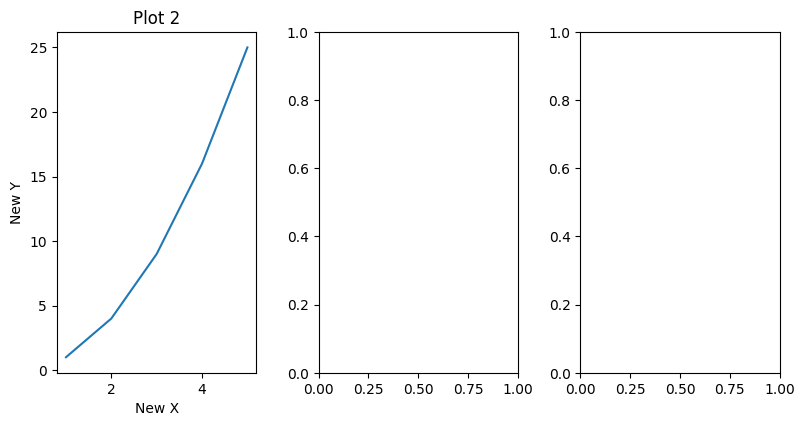

In [12]:
'''
Creates a figure (fig_2) iwth a 1x3 grid of axes (axes_2)

Our rows and columns wil be an array of 3 axes (subplots) that's laid out in one row and three columns.
THen the entire figure is 8 inches wide and 4 inches tall.

The tight layout automatically adjusts the spacing between subplots to prevent them from overlapping or. Though only call this after setting up
your title and labels

Then we access teh second subplot (since Python uses zero-based indexing). All in all this all just gives you control when creating your plots.
'''

fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
axes_2[1].set_title("Plot 2")
axes_2[1].set_xlabel("New X")
axes_2[1].set_ylabel("New Y")

plt.tight_layout() 
axes_2[1].plot(x,y)

## Appearance
You can also stylize your plots

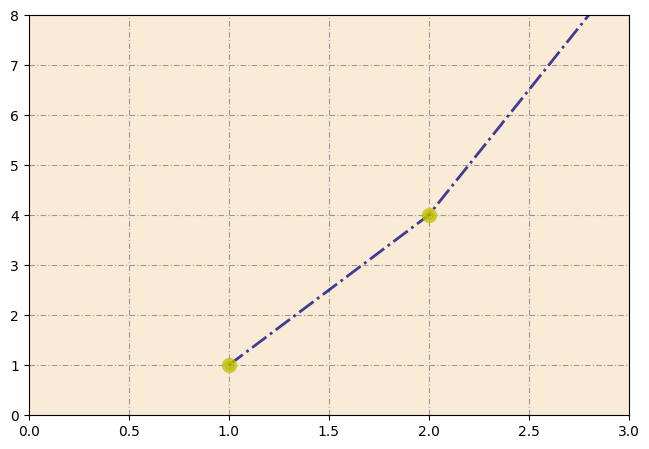

In [14]:
fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])

# Default colors (b: blue, g: green, r: red, c: cyan, m: magenta,
# y: yellow, k: black, w: white)
# color="0.75" creates a 75% gray
# You can use hexcodes color="#eeefff"
# You can use color names found next like this color="burlywood"
# https://en.wikipedia.org/wiki/Web_colors
# alpha defines the percentage of opacity

# The default line width is 1, so to double it put in 2 and so forth

# There are many line styles 
# matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
# You can also provide a sample like '-.'

# Markers can mark your provided points on the graph
# https://matplotlib.org/3.3.0/api/markers_api.html
# You can change the markersize as well

# markerfacecolor changes the marker fill color
# markeredgecolor changes the marker stroke color
# markeredgewidth changes the markers stroke size

axes_3.plot(x,y,color='navy', alpha=.75, lw=2, ls='-.',
           marker='o', markersize=7, markerfacecolor='y',
           markeredgecolor='y', markeredgewidth=4)

# Set the lower and upper bound of x & y axis; 
axes_3.set_xlim([0,3])
axes_3.set_ylim([0,8])

# Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
axes_3.grid(True, color='0.6', dashes=(5, 2, 1, 2))
# Set grid background color
axes_3.set_facecolor('#FAEBD7')

## Saving graphs to a file
You can very easily create and save your plots to a file. Literally just change the extension to what you want to save it as.

In [16]:
fig_3.savefig("3rd_plot.png")
fig_3.savefig("3rd_plot.pdf")

## Working with Pandas DataFrame
Finally, let's starting integrating Pandas and visualization.

Text(60, 520, 'good month')

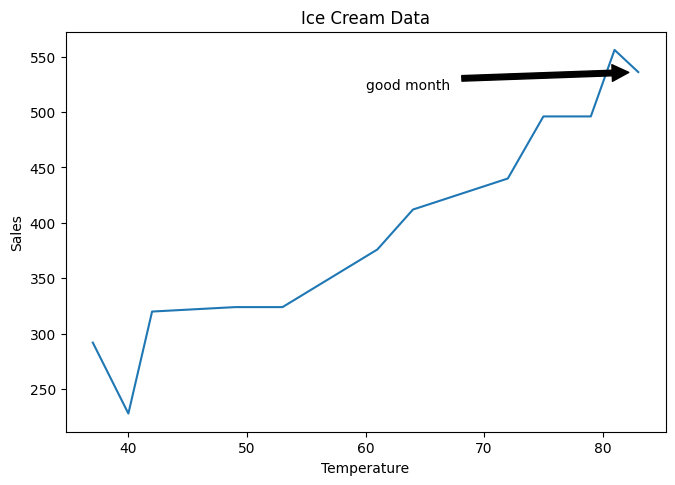

In [27]:
ics_df = pd.read_csv("../data/icecreamsales.csv")
ics_df = ics_df.sort_values(by='Temperature') 


'''
Convert from pandas data frame into a NumPy array. So this array should take the form of a 2d matrix
in the form.
[
  [temp-1, sales-1],
  ...
  [temp-n, sales-n]
]

Get all temperatures values as x values. get all sales values as our y values
'''
np_arr = ics_df.values 
x = np_arr[:, 0] 
y = np_arr[:, 1]

fig = plt.figure(figsize=(6,4))
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Temperature")
axes.set_ylabel("Sales")
axes.set_title("Ice Cream Data")
axes.plot(x,y)

# We can also annotate our graph. So I know (83,536) is a real point in our data so I'll point to it. Then I'll have some text and an arrow 
# point to that particular data point. Just kind of an extra thing.
axes.annotate("good month", xy=(83, 536), xytext=(60,520), arrowprops=dict(
  facecolor="black",
  shrink=0.05
))

## Histogram


(array([0.02938571, 0.06615714, 0.09365714, 0.12414286, 0.14645714,
        0.1837    , 0.15384286, 0.12162857, 0.08831429, 0.06474286,
        0.02797143]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 [<matplotlib.patches.Polygon at 0x1f3f2468b30>])

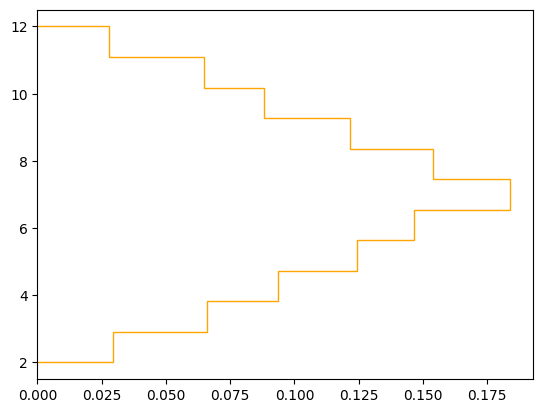

In [36]:
arr_1 = np.random.randint(1,7, 7000)
arr_2 = np.random.randint(1,7,7000)

# Then add up the arrays; like adding up two dice rolls. The possibilities are 2 to 11 for the sum of hte dice role.
arr_3 = arr_1 + arr_2

'''
- density: Returns the frequency of your bins.
- histtype: Instead of filling in the histogram, we just leave the outline of it.

'''
plt.hist(arr_3, bins=11, density=True, stacked=True, histtype="step", orientation="horizontal", color="orange")

## Bar Charts

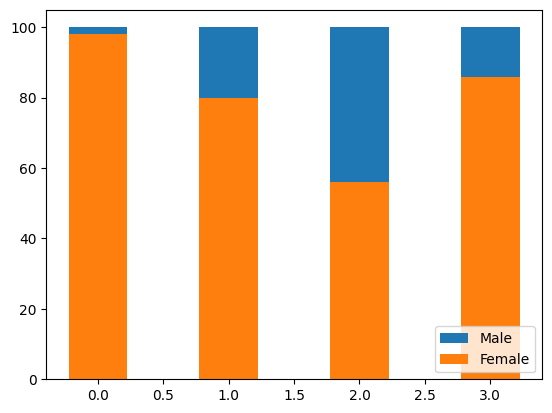

In [40]:
# Analyze where France gets its electricity from
x = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
per_1 = [71, 10, 3, 7, 2, 4, 3]
# Chart variance in usage
variance = [8, 3, 1, 3, 1, 2, 1]
# barh makes horizontal chart
# Also yerr, change error color with 'ecolor'
# plt.bar(x, per_1, color='purple', yerr=variance)


# Show percentages of males & females in engineering
m_eng = (76, 85, 86, 88, 93)
f_eng = (24, 15, 14, 12, 7)
# Get evenly spaced values for each interval; we have 5 data points so we'll do 5 intervals
spc = np.arange(5)

# plt.bar(spc,m_eng,width=0.45, label="Male", edgecolor='k')
# plt.bar(spc + 0.45,f_eng,width=0.45, label="Female", edgecolor='k')
# plt.xticks(spc+0.45/2, ('Aero','Chem','Civil','Elec','Mech'))


# Now let's do a stacked bar chart for the people in teaching
t_type = ['Kind','Elem','Sec','Spec']
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 80, 56, 86])
ind = [x for x, _ in enumerate(t_type)]

plt.bar(ind, m_teach, width=0.45, label="Male", bottom=f_teach)
plt.bar(ind, f_teach, width=0.45, label="Female", )
plt.legend(loc="lower right")



## Pie Charts

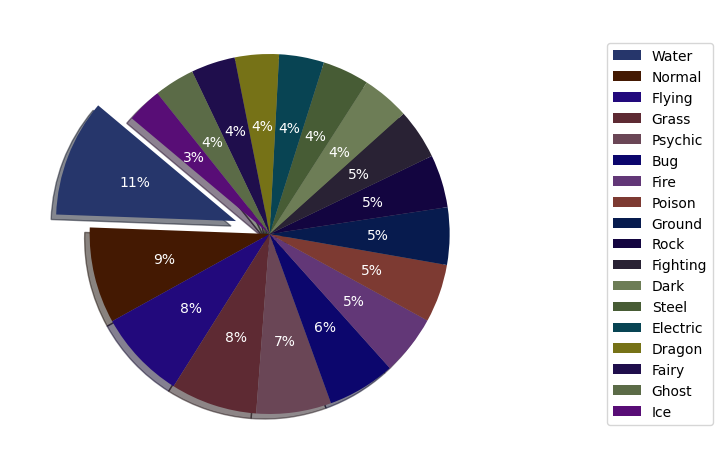

In [42]:
import random

fig_6 = plt.figure(figsize=(8,5),dpi=100)
axes_6 = fig_6.add_axes([0.1,0.1,0.9,0.9])

# Create a pie chart of the number of Pokemon by type
types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fairy',
'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

# Generate a random color array (Use lower values to make darkb)
colors = []
for i in range(18):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)
    
# Explode biggest 1st slice; Exploding is the idea of a slice being highlighted visually.
explode = [0] * 18
explode[0] = 0.2

# Provide values, what to explode and by how much, labels, colors, pct for values,
# whether to shadow, amount to rotate pie, pie text color
wedges, texts, autotexts = plt.pie(poke_num, explode=explode, labels=types, colors=colors, 
                                   autopct='%1.0f%%', shadow=True, startangle=140, 
                                   textprops=dict(color="w"))
# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, types, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

## Timeseries 
We can also plot time series data

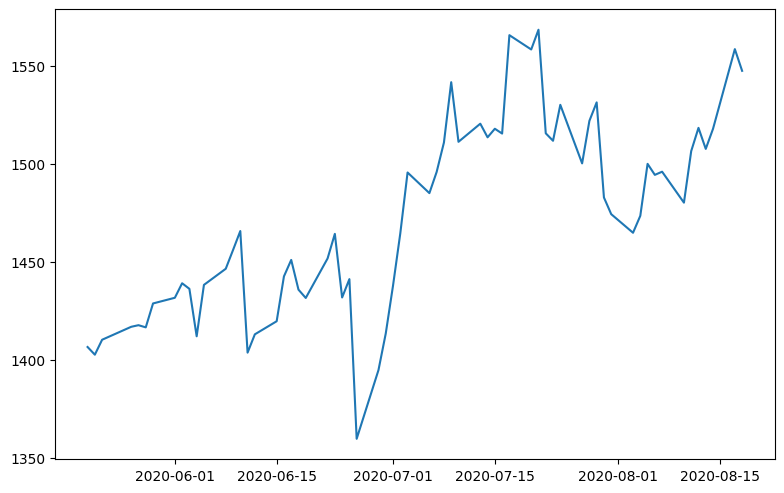

In [44]:
import datetime
'''
We're going to create a graph, with x-values being dates, and y values being the closing price for Google's stock prices.

'''

goog_df = pd.read_csv("../data/GOOG.csv")
goog_np = goog_df.to_numpy()

# Get the closing price as an array since that's going to be our y values
goog_close_price = goog_np[:, 4]

'''
1. Create an array of holidays that we want to exclude when cleaning and rendering our data.
2. Also creates a range of business days between two dates. The frequency parameter that we've set here includes only 
business days (weekdays) that aren't in the custom holiday list. 
'''
holidays = [datetime.datetime(2020,5,25),  datetime.datetime(2020,8,19)]
date_arr = pd.bdate_range(start="5/20/2020", end="8/19/2020", freq="C", holidays=holidays)
date_arr_np = date_arr.to_numpy()


fig = plt.figure(figsize=(8,5), dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np, goog_close_price)

## Scatter plots
Matplotlib can al
so be used to create data tables that you can visualize

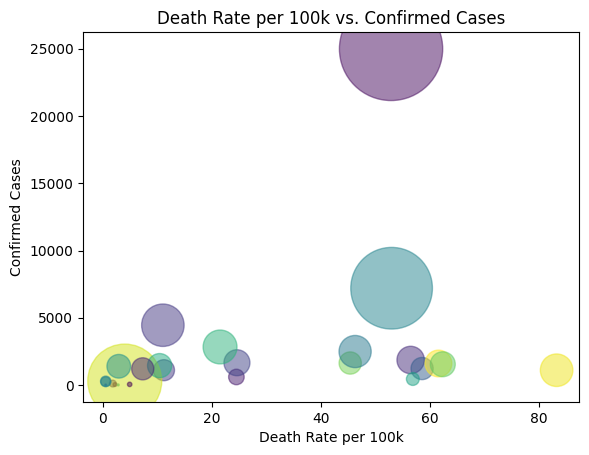

In [45]:
# Country array
cnt_arr = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])
# Death rate per 100k Coronavirus
dr_arr = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])
# Daily confirmed cases (Tests)
test_arr = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])
# Dot size Confirmed cases
cc_arr = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])
cc_arr_sm = cc_arr / 1000

# For each country choose a separate color
color_arr = np.random.rand(26)


# 
plt.title('Death Rate per 100k vs. Confirmed Cases')
plt.xlabel('Death Rate per 100k')
plt.ylabel('Confirmed Cases')
plt.scatter(dr_arr,test_arr,s=cc_arr_sm,c=color_arr,alpha=0.5)